Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9912280701754386


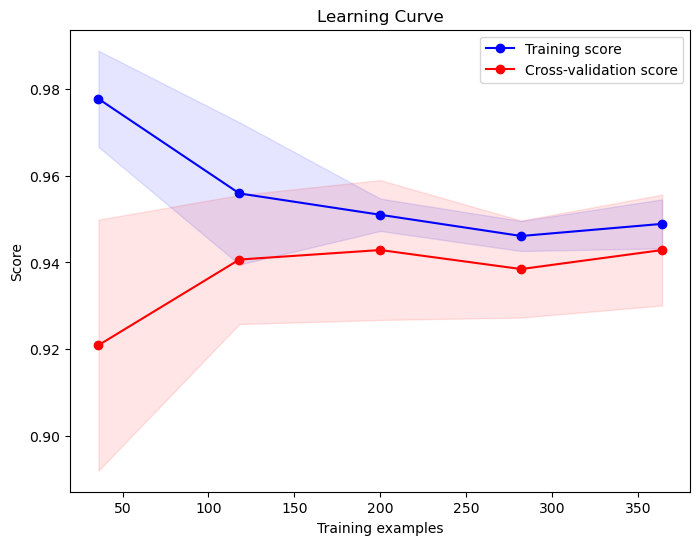

In [1]:
#SVM with kernel on Breast Cancer.

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load dataset
breast_cancer = datasets.load_breast_cancer()

# Assume X_cancer and y_cancer are your features and labels
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly']  # You can add more kernels to test
}

# Initialize SVM classifier
svm_model = SVC()

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X_train_pca, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9912280701754386


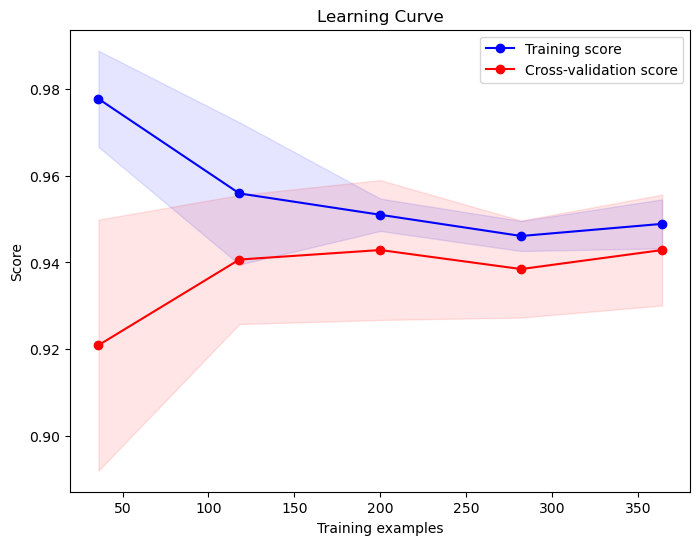

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear', 'poly']  # You can add more kernels to test
}

# Initialize SVM classifier
svm_model = SVC()

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions using the best model
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plotting learning curve
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X_train_pca, y_train, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="b")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()


Best Hyperparameters: {'n_clusters': 6}


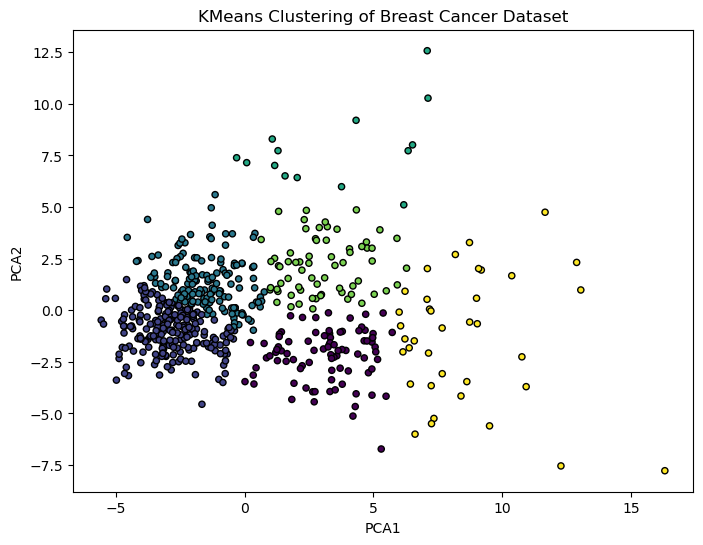

In [2]:
#Clustering on Breast Cancer dataset

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_cancer = breast_cancer.data
y_cancer = breast_cancer.target

# Standardize features
scaler = StandardScaler()
X_cancer_std = scaler.fit_transform(X_cancer)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_cancer_pca = pca.fit_transform(X_cancer_std)

# Define the parameter grid for Grid Search
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6]  # Adjust the number of clusters to test
}

# Initialize KMeans classifier
kmeans = KMeans()

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(kmeans, param_grid, cv=5)
grid_search.fit(X_cancer_pca)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Fit KMeans with the best number of clusters
best_kmeans = KMeans(n_clusters=best_params['n_clusters'])
best_kmeans.fit(X_cancer_pca)

# Predict cluster labels
cluster_labels = best_kmeans.labels_

# Plotting cluster chart
plt.figure(figsize=(8, 6))
plt.scatter(X_cancer_pca[:, 0], X_cancer_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=20)
plt.title('KMeans Clustering of Breast Cancer Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Assess accuracy if true labels are available
# Replace 'y_true' with the true labels if available
# accuracy = accuracy_score(y_true, cluster_labels)
# print(f"Accuracy: {accuracy}")
